<a href="https://colab.research.google.com/github/asghargit/asghar2/blob/main/colin_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data() # COCO, Cifar10 mnisnt - images of handwritten numbers

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalizing the values and getting them into 0 and 1 values

In [5]:
print("Train shape:", x_train.shape) # shape is always 28.28.1
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), # input layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),# there are many activation functions like sigmoid tanh relu # hidden layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'), # hidden layer

    layers.Flatten(),
    layers.Dense(64, activation='relu'), # hidden layer
    layers.Dense(10, activation='softmax')  # 10 classes in MNIST  # output layer
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [34]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop],
                    batch_size=64)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9928 - loss: 0.0207 - val_accuracy: 0.9926 - val_loss: 0.0236
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9956 - loss: 0.0128 - val_accuracy: 0.9922 - val_loss: 0.0292
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.9907 - val_loss: 0.0311
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.9891 - val_loss: 0.0379
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9918 - val_loss: 0.0309
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9971 - loss: 0.0086 - val_accuracy: 0.9916 - val_loss: 0.0340
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9929 - val_loss: 0.0309
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9910 - loss: 0.0559
Test accuracy: 0.9909999966621399


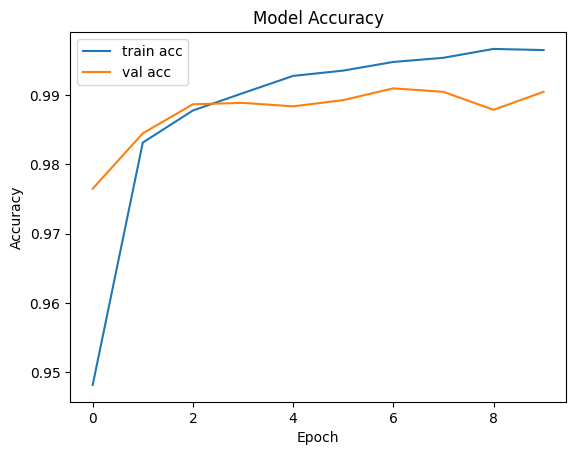

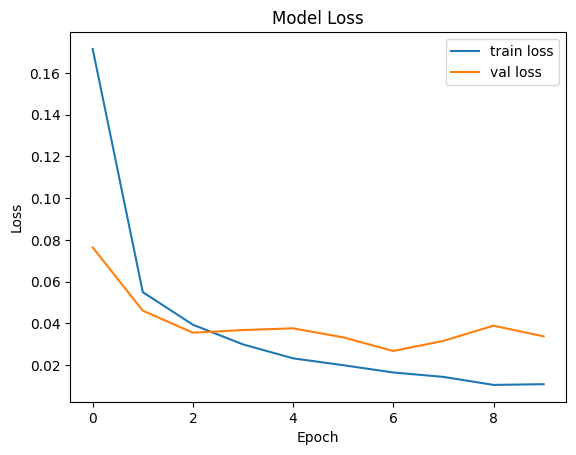

In [13]:
import matplotlib.pyplot as plt

# 🔹 Plot Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 🔹 Plot Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
